### <b> Introduction

A novel dataset has been made available for my bankruptcy prediction project, focusing on American public companies listed on the New York Stock Exchange and NASDAQ. The dataset includes accounting data from 8,262 distinct companies covering the period from 1999 to 2018.

According to the Security Exchange Commission (SEC) criteria, companies in the American market are classified as bankrupt under two scenarios. The first scenario is when the company's management files for Chapter 11 of the Bankruptcy Code, indicating their intention to "reorganize" the business while still overseeing day-to-day operations, subject to approval from a bankruptcy court for significant business decisions. The second scenario is when the company's management files for Chapter 7 of the Bankruptcy Code, indicating a complete cessation of operations and the company going out of business entirely.

For the dataset, the fiscal year preceding the bankruptcy filing under either Chapter 11 or Chapter 7 is labeled as "Bankruptcy" (1) for the subsequent year. On the other hand, if a company does not experience bankruptcy events, it is considered to be operating normally (0). The dataset is reliable and complete, with no missing values, synthetic entries, or imputed added values.

In total, the dataset comprises 78,682 observations of firm-year combinations. To facilitate model training and evaluation, the dataset is divided into three subsets based on time periods. The training set spans from 1999 to 2011, the validation set covers the years 2012 to 2014, and the test set includes data from 2015 to 2018. The test set will serve as a critical component to assess the models' predictive capabilities in real-world scenarios, dealing with unseen cases. This arrangement ensures that the developed models are robust and reliable for future applications in the prediction of bankruptcy events.

### <b> Data Description

<b><i>Variable Name	Description</i></b>
- X1	Current assets - Refers to all the assets of a company that are expected to be converted into cash or used up within the next year due to standard business operations.
- X2	Cost of goods sold - Represents the total expenses incurred by a company directly related to the production and sale of products.
- X3	Depreciation and amortization - Depreciation signifies the reduction in value of tangible fixed assets, such as machinery, buildings, and equipment, over time. Amortization, on the other hand, refers to the reduction in value of intangible assets over a specific period.
- X4	EBITDA - Stands for Earnings Before Interest, Taxes, Depreciation, and Amortization. It serves as a financial metric that reflects a company's overall financial performance, providing an alternative to net income.
- X5	Inventory - Denotes the accounting of items and raw materials that a company holds for production or sale purposes.
- X6	Net Income - Represents the profitability of a company after all expenses and costs have been deducted from its total revenue.
- X7	Total Receivables - Indicates the total amount of money that customers owe to a company for goods or services delivered but not yet paid for.
- X8	Market value - In this dataset, it refers to the market capitalization of publicly traded companies, which represents the total market value of their outstanding shares.
- X9	Net sales - Represents the total revenue generated by a company from its sales after accounting for returns, allowances, and discounts.
- X10	Total assets - Encompasses all the assets, tangible or intangible, that a business owns and holds value.
- X11	Total Long-term debt - Refers to the total outstanding loans and liabilities that a company is obligated to repay after one year from the balance sheet date.
- X12	EBIT - Stands for Earnings Before Interest and Taxes. It represents a company's operating profit before accounting for interest and tax expenses.
- X13	Gross Profit - Denotes the profit a business generates from its core operations after deducting all the costs associated with manufacturing and selling its products or services.
- X14	Total Current Liabilities - Represents the sum of short-term obligations and debts that a company must settle within the current operating cycle, including accounts payable, accrued liabilities, and taxes.
- X15	Retained Earnings - Signifies the amount of profit a company retains after paying all direct and indirect costs, income taxes, and dividends to shareholders.
- X16	Total Revenue - Refers to the total income generated by a business from all sales before accounting for any expenses. It may also include interest and dividends from investments.
- X17	Total Liabilities - Encompasses all the debts and obligations that a company owes to external parties.
- X18	Total Operating Expenses - Represents the total expenses incurred by a business during its normal course of operations.

### <b>1. Data Exploration

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=f198ffa9986fe458da3950bba09d55cb804c56836f2e6e57235e9254329af9c7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


#### <b>1.1. Importing required Libraries

In [2]:
import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 2: Create a Spark session
spark = SparkSession.builder.appName("Bankruptcy_Project").getOrCreate()

# Step 3: Read the data from the CSV file
file_path = "american_bankruptcy.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

#### <b>1.2. Intial Data Exploration

In [3]:
# Check the schema and first few rows of the DataFrame
df.printSchema()

root
 |-- company_name: string (nullable = true)
 |-- status_label: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- X1: double (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: double (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: double (nullable = true)
 |-- X11: double (nullable = true)
 |-- X12: double (nullable = true)
 |-- X13: double (nullable = true)
 |-- X14: double (nullable = true)
 |-- X15: double (nullable = true)
 |-- X16: double (nullable = true)
 |-- X17: double (nullable = true)
 |-- X18: double (nullable = true)



In [4]:
df.show(5)

+------------+------------+----+-------+-------+------+------+-------+-------+-------+--------+--------+-------+-------+------+-------+-------+-------+--------+-------+-------+
|company_name|status_label|year|     X1|     X2|    X3|    X4|     X5|     X6|     X7|      X8|      X9|    X10|    X11|   X12|    X13|    X14|    X15|     X16|    X17|    X18|
+------------+------------+----+-------+-------+------+------+-------+-------+-------+--------+--------+-------+-------+------+-------+-------+-------+--------+-------+-------+
|         C_1|       alive|1999|511.267|833.107|18.373|89.031|336.018| 35.163|128.348|372.7519|1024.333|740.998|180.447|70.658|191.226|163.816|201.026|1024.333|401.483|935.302|
|         C_1|       alive|2000|485.856|713.811|18.577|64.367| 320.59| 18.531|115.187| 377.118| 874.255|701.854|179.987| 45.79|160.444|125.392|204.065| 874.255|361.642|809.888|
|         C_1|       alive|2001|436.656|526.477|22.496|27.207|286.588|-58.939| 77.528|364.5928| 638.721|710.199|217

In [5]:
# Check the summary statistics of numerical columns
df.describe().show()

+-------+------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+
|summary|company_name|status_label|              year|                X1|                X2|                X3|                X4|                X5|                X6|                X7|                X8|                X9|               X10|              X11|               X12|              X13|              X14|              X15|               X16|               X17|               X18|
+-------+------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------

In [6]:
# Check for missing values
missing_counts = df.select([F.count(F.when(F.isnan(col) | F.col(col).isNull(), col)).alias(col) for col in df.columns])
missing_counts.show()

+------------+------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|company_name|status_label|year| X1| X2| X3| X4| X5| X6| X7| X8| X9|X10|X11|X12|X13|X14|X15|X16|X17|X18|
+------------+------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|           0|           0|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
+------------+------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [7]:
df_cleaned = df

In [8]:
df_cleaned.columns

['company_name',
 'status_label',
 'year',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18']

- There are no missing values in the data

<b> Observations</b>

It is observed that there are 21 columns in the data and there are no null values present in the data.
 a summary analysis of the dataset using the `data.describe().show()` function is performed to gain insights into the key statistics of the variables. The dataset contains 78,682 samples, each representing a company's financial information over the years. The dataset covers the period from 1999 to 2018, with a mean year of 2007.5 and a standard deviation of approximately 5.74, indicating that the data spans nearly two decades.

For the financial indicators, we observed variations across the variables. Variables like `X1` (Current assets), `X4` (EBITDA), and `X9` (Net sales) show relatively lower standard deviations, suggesting less variability within the dataset for these features. On the other hand, variables such as `X2` (Cost of goods sold) and `X10` (Total assets) exhibit larger standard deviations, indicating more significant variations in these attributes.

In terms of measures of central tendency, the mean values of `X3` (Depreciation and amortization) and `X7` (Total Receivables) are relatively lower, indicating that companies typically have lower depreciation costs and receivables compared to other features. Conversely, variables such as `X5` (Inventory) and `X14` (Total Current Liabilities) have higher mean values, suggesting higher inventory levels and current liabilities on average.







### <b>2. Exploratory Data Analysis

#### <b>2.1. Univariate Data Analysis

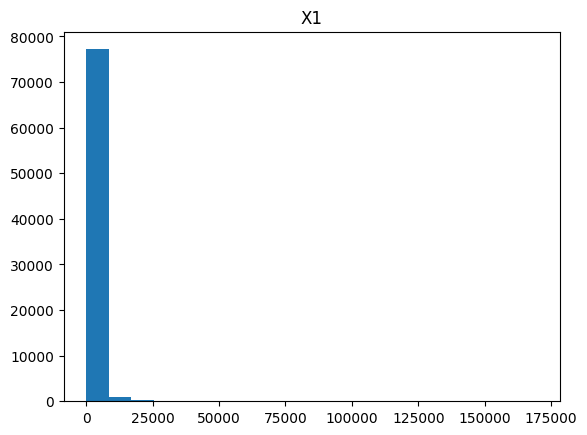

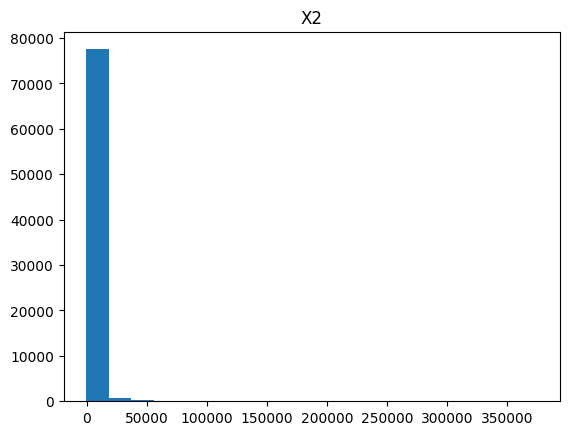

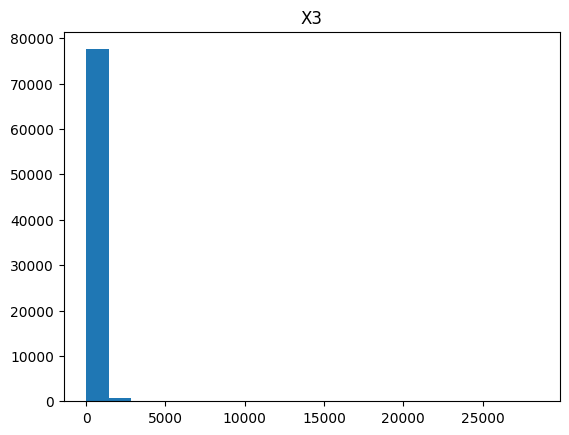

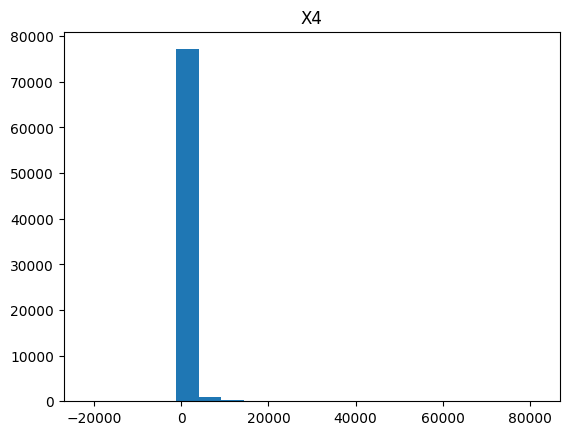

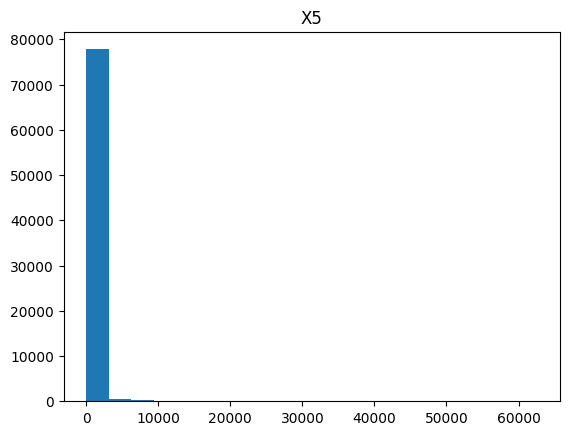

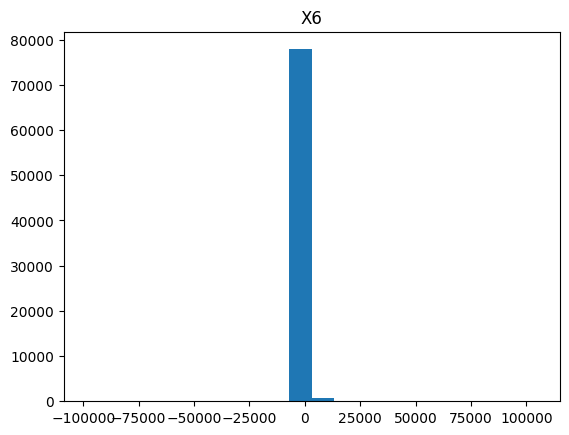

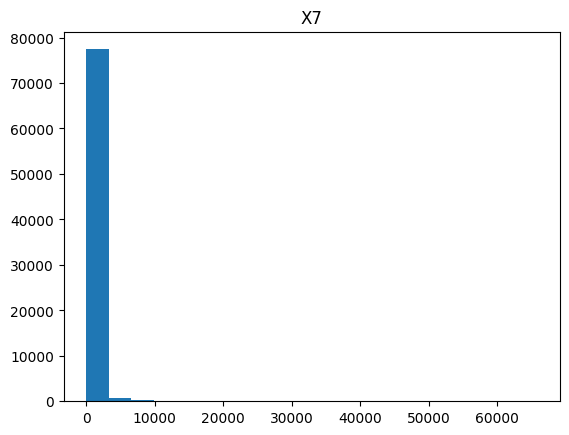

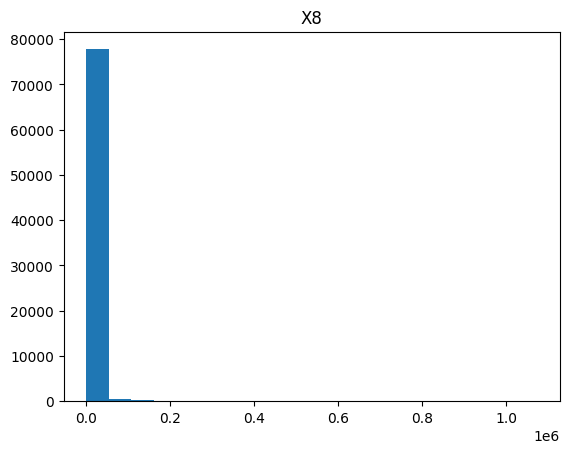

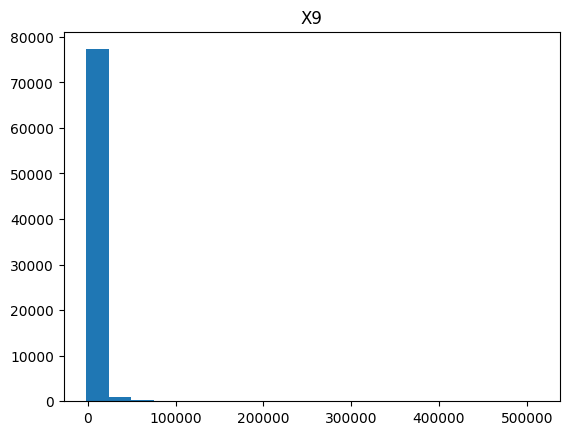

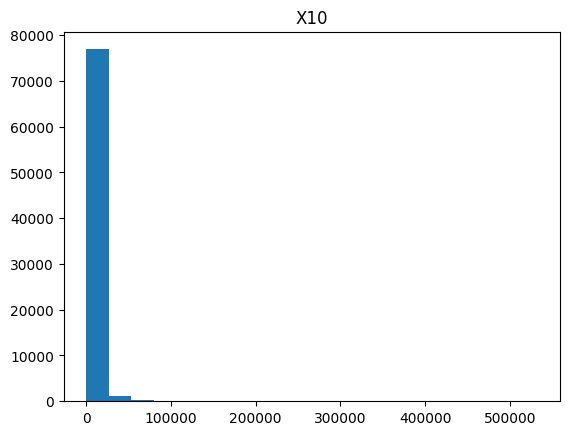

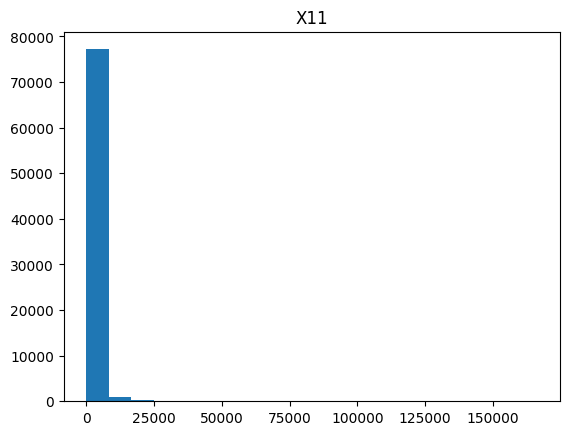

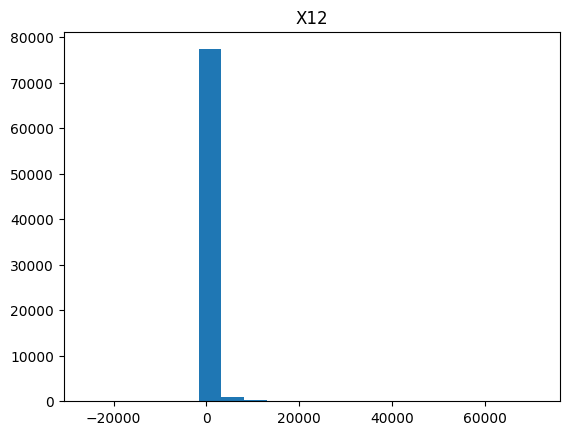

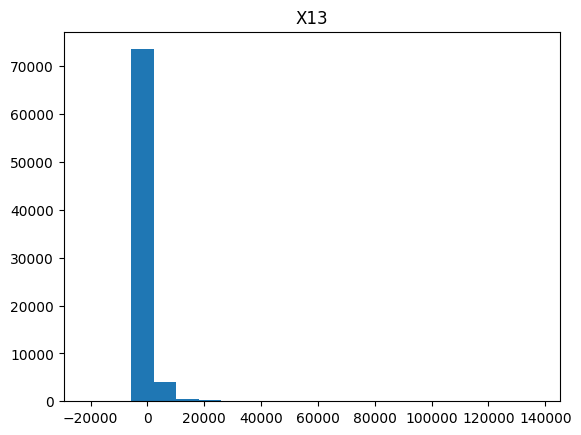

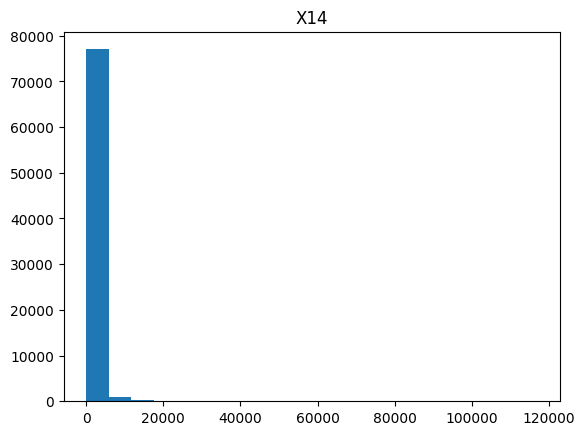

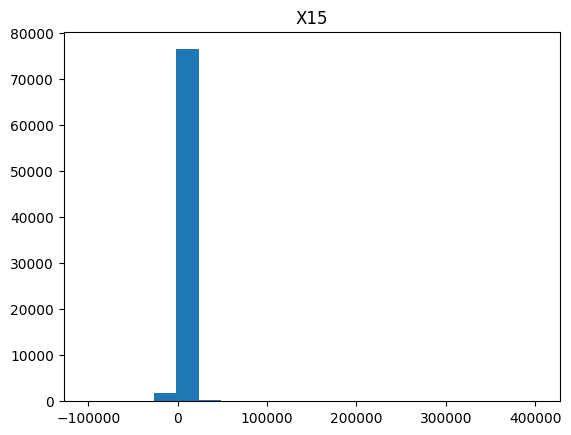

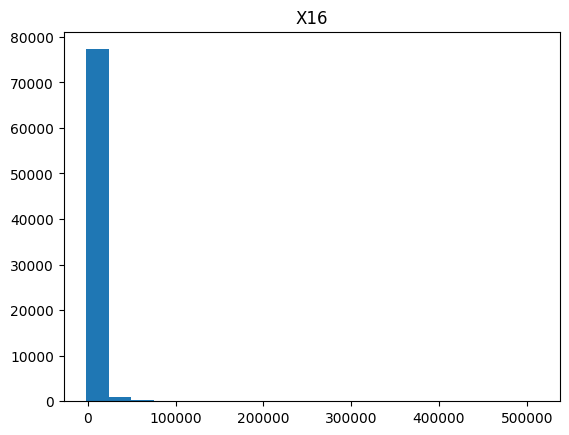

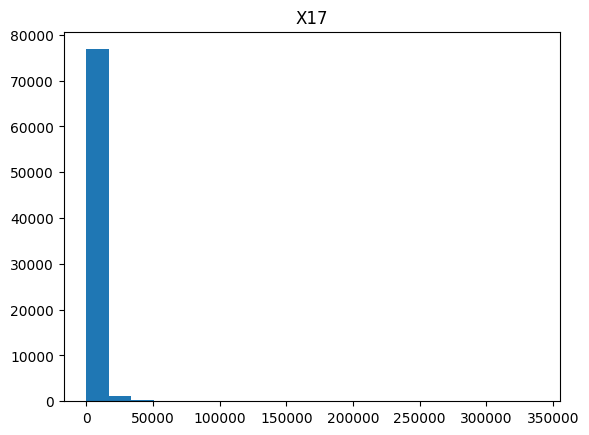

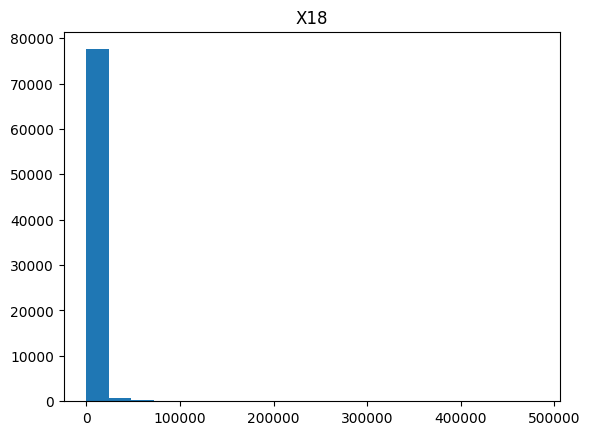

In [9]:
import matplotlib.pyplot as plt

num_cols = [
 'X1', 'X2', 'X3', 'X4', 'X5',
 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
for col in num_cols:
    plt.hist(df_cleaned.select(col).rdd.flatMap(lambda x: x).collect(), bins=20)
    plt.title(col)
    plt.show()



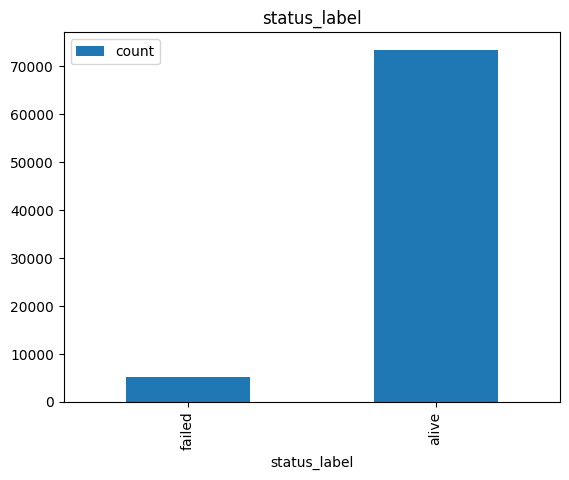

In [10]:

# Example: Plot bar chart for categorical features
cat_cols = [ "status_label"]
for col in cat_cols:
    df_cleaned.groupBy(col).count().toPandas().plot(kind='bar', x=col, y='count')
    plt.title(col)
    plt.show()

In [11]:
# lets convert this to pandas df for better visualization
df_pandas = df_cleaned.toPandas()

In [12]:
df_pandas.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [13]:
df_pandas.shape

(78682, 21)

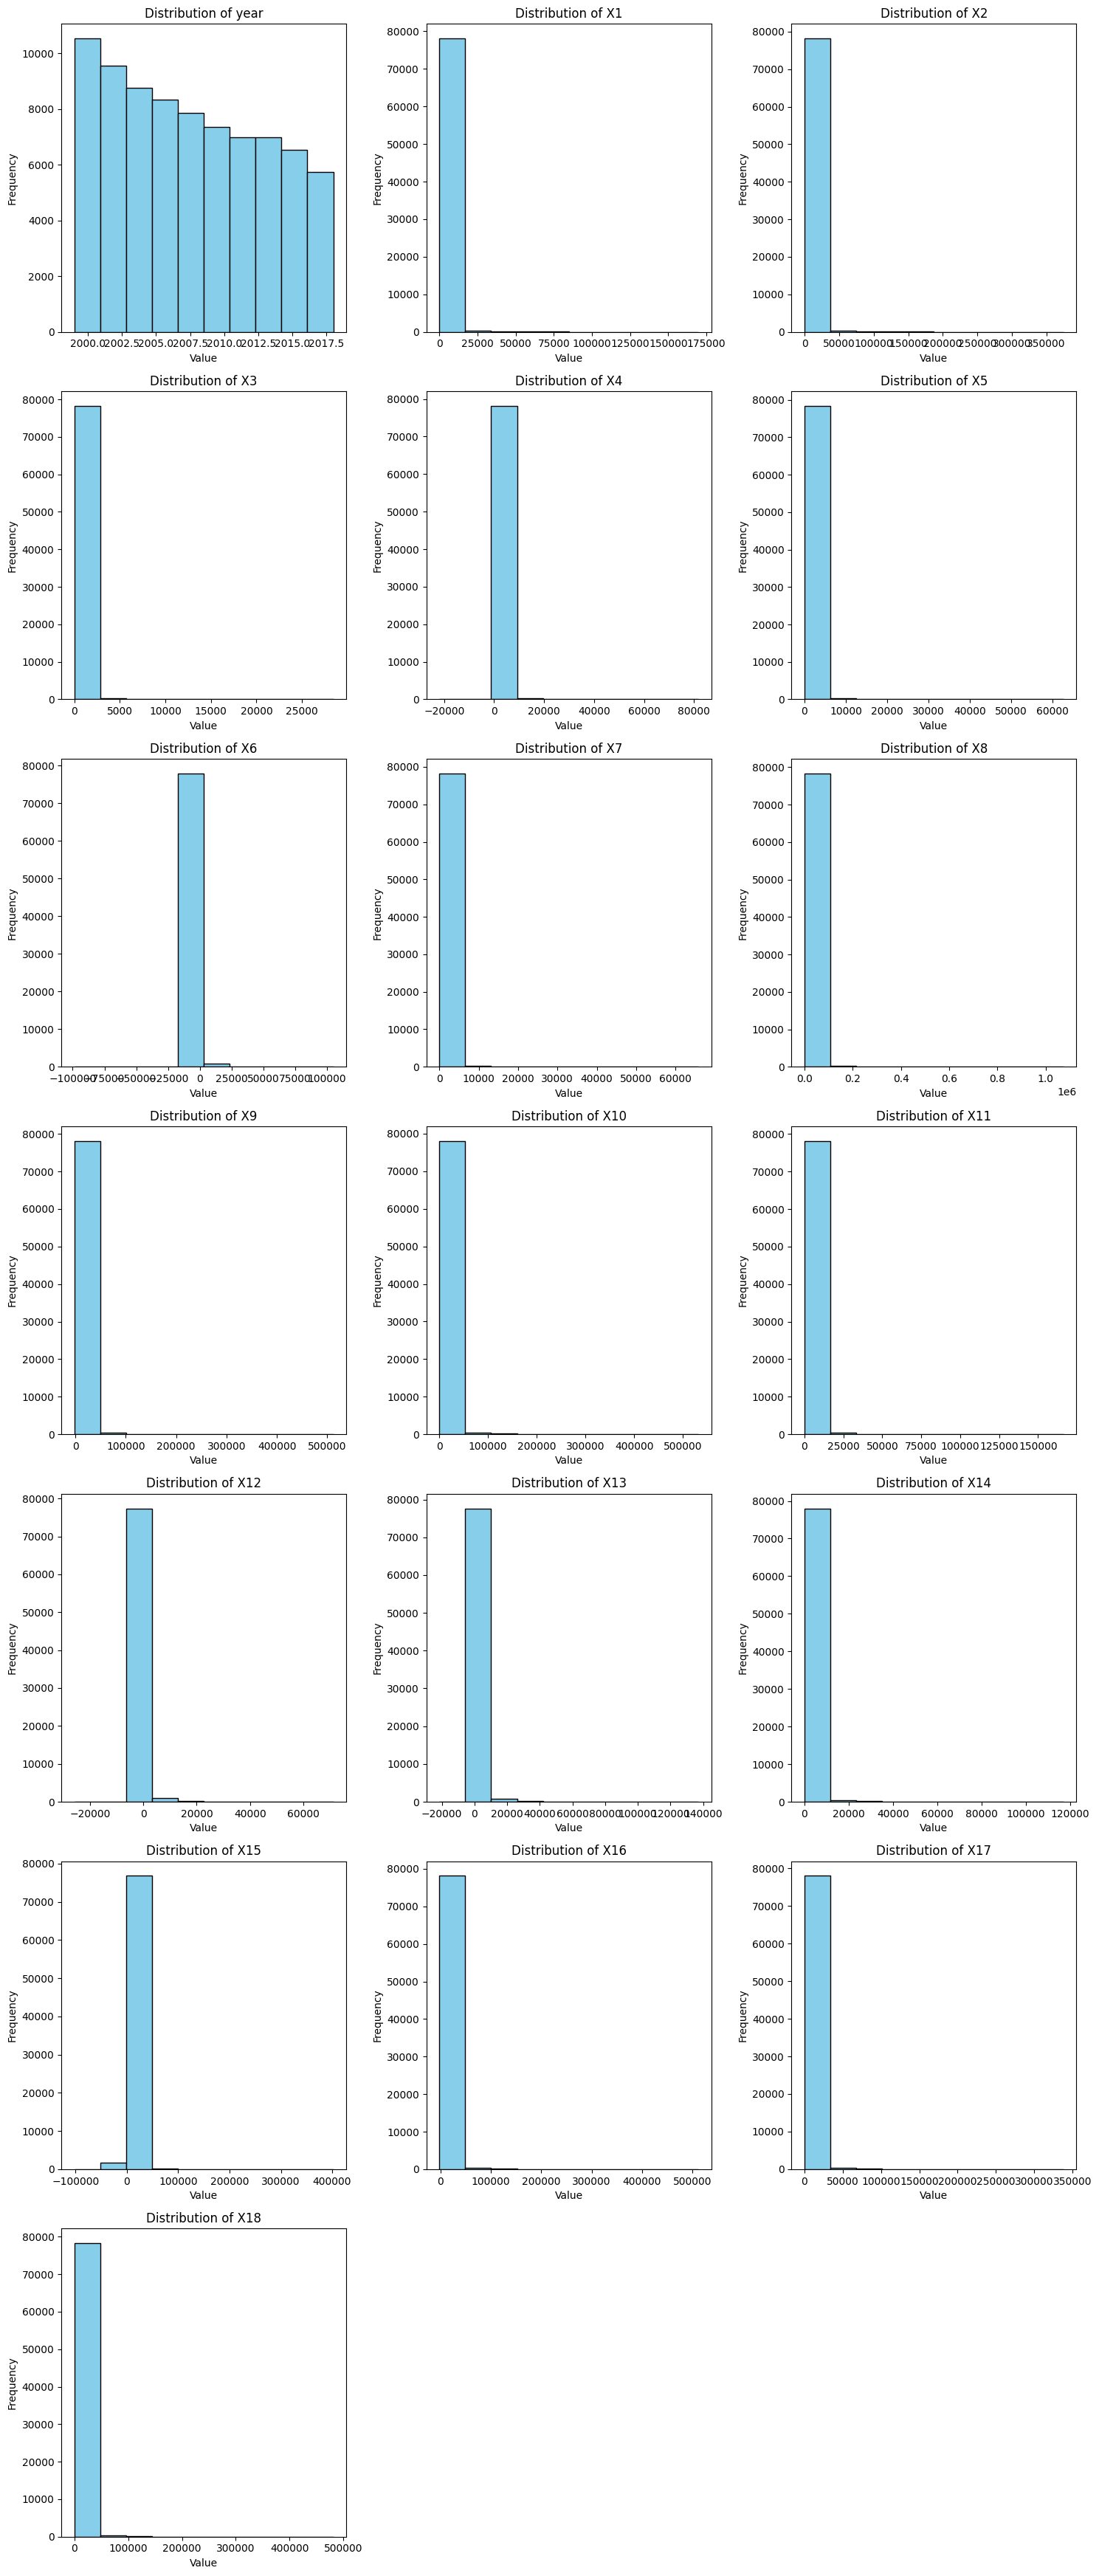

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Selecting all numerical features
numerical_features = ["year", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18"]

# Creating subplots for each numerical feature
num_features_count = len(numerical_features)
num_rows = num_features_count // 3 + (num_features_count % 3 > 0)  # Adjusting the number of rows based on the number of features
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Plotting histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    axes_flat[i].hist(df_pandas[feature],  edgecolor='black', color='skyblue')
    axes_flat[i].set_title(f"Distribution of {feature}")
    axes_flat[i].set_xlabel("Value")
    axes_flat[i].set_ylabel("Frequency")

# Removing any empty subplots
for i in range(num_features_count, num_rows * 3):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()


<b>Observations</b>
It is observed that most values are constituted in the first histogram block for all the numerical features and from the barplot of the target featurre, it can be observed that it is highly imbalanced and further treating this imbalance might be required before performing any modeling.

#### <b>2.2. Bivariate Analysis

<b> Time Series Plot

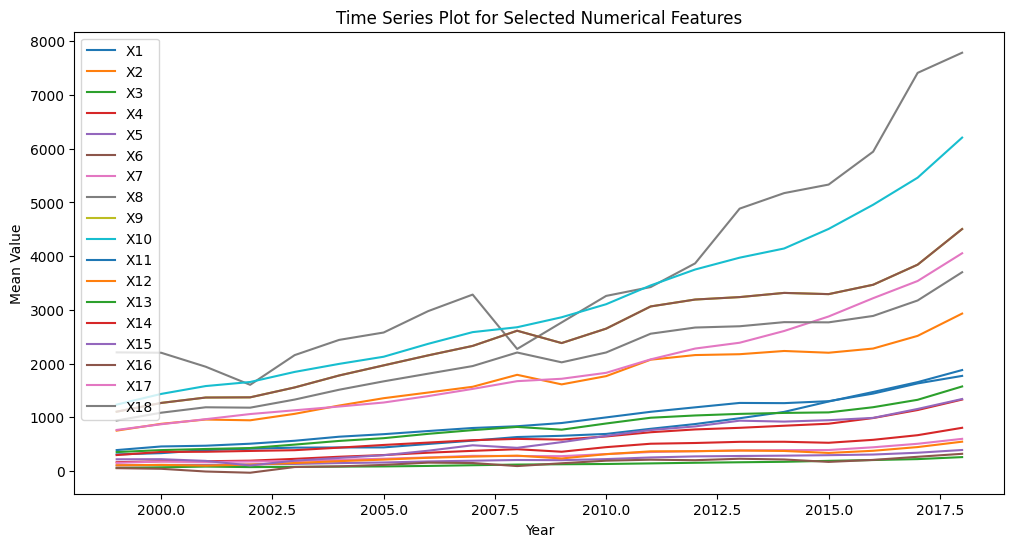

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# df_pandas['year'] = pd.to_datetime(df_pandas['year'])

# Grouping data by 'year' and calculate mean of numerical features
grouped_data = df_pandas.groupby('year').mean()

# Plot Time Series for selected numerical features
selected_features = [
 'X1', 'X2', 'X3', 'X4', 'X5',
 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(grouped_data.index, grouped_data[feature], label=feature)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Time Series Plot for Selected Numerical Features')
plt.legend()
plt.show()


<b> Pairplot

In [16]:
import seaborn as sns

selected_features = [
 'X1', 'X2', 'X3', 'X4', 'X5',
 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
sns.pairplot(df_pandas[selected_features], diag_kind='kde')
plt.suptitle("Scatter Matrix Plot for Selected Numerical Features")
plt.show()


Output hidden; open in https://colab.research.google.com to view.

<b> Box-plot

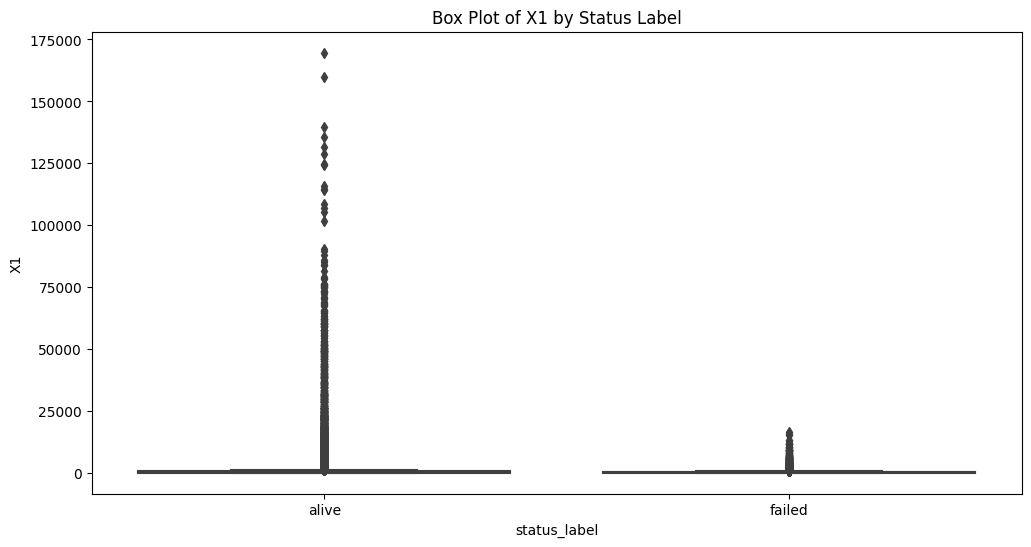

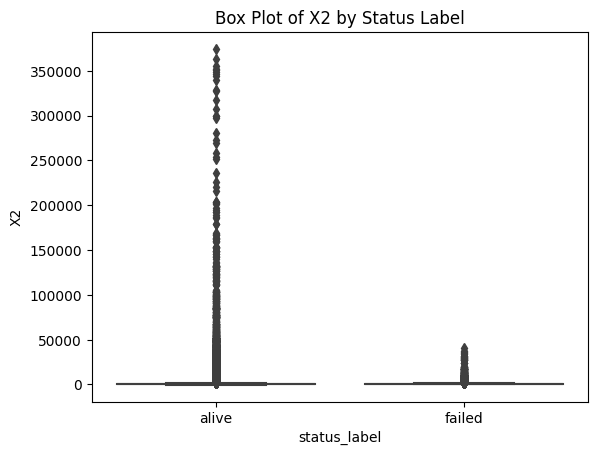

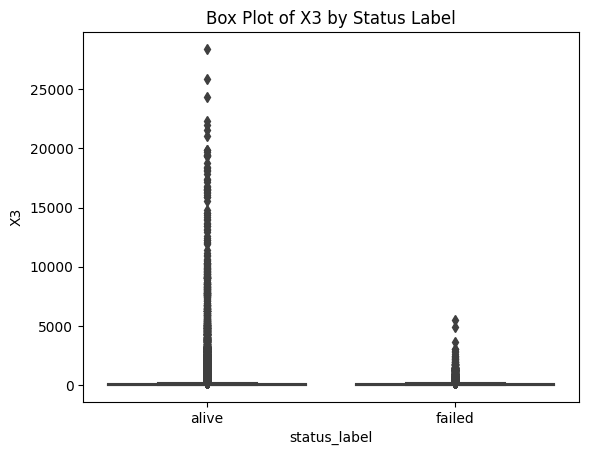

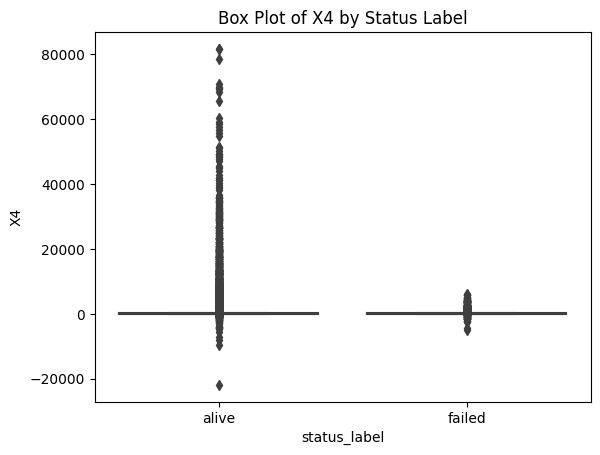

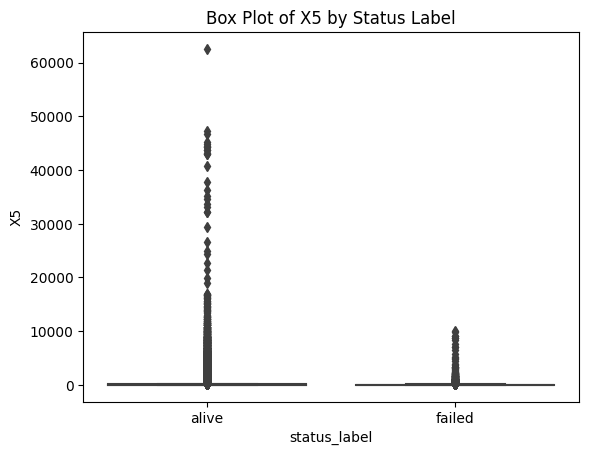

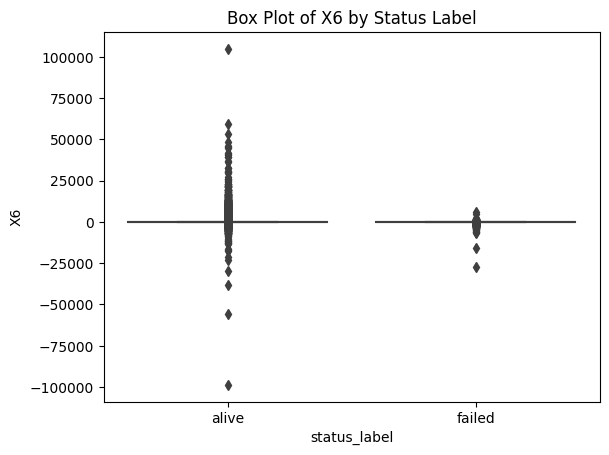

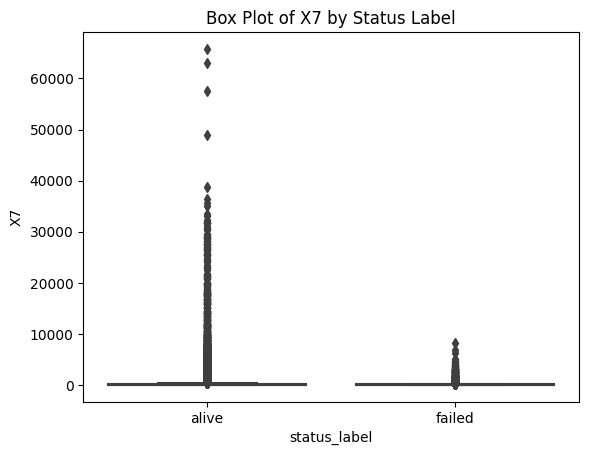

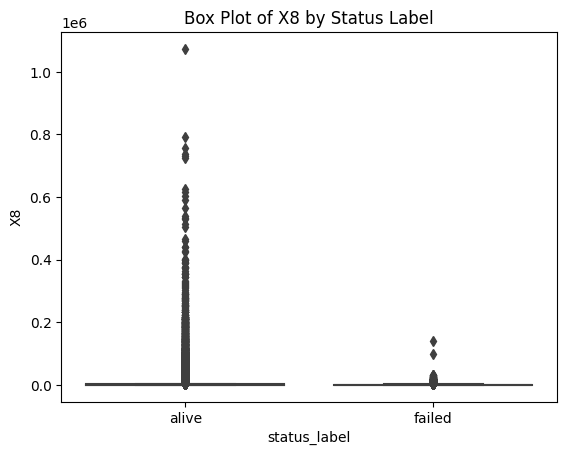

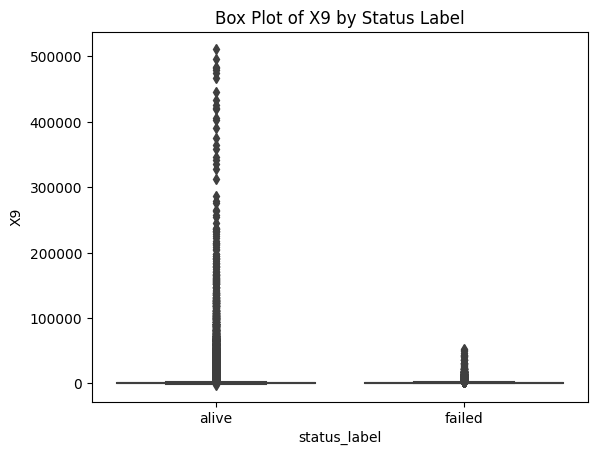

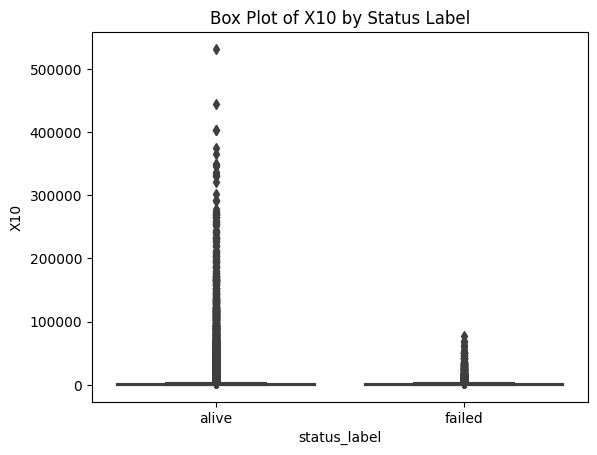

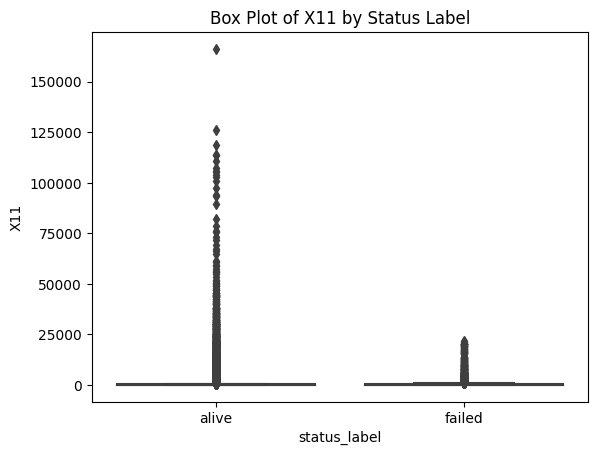

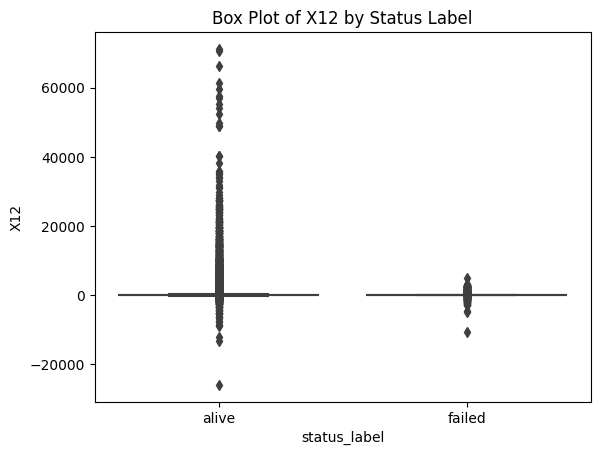

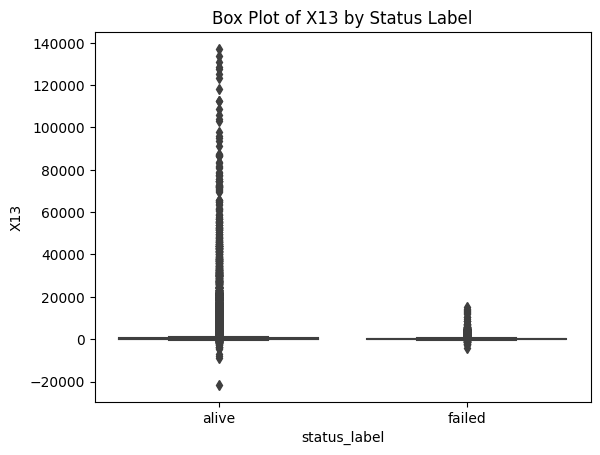

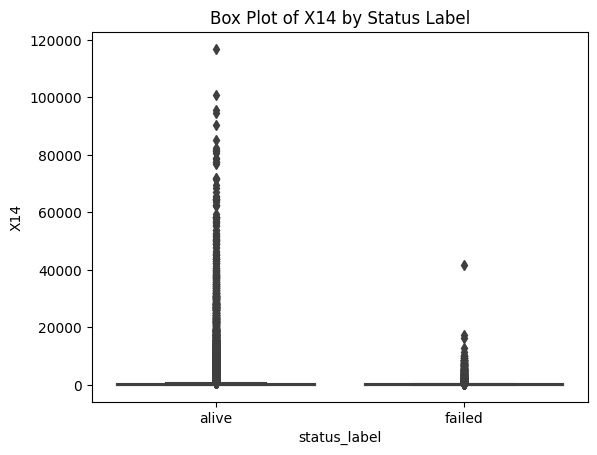

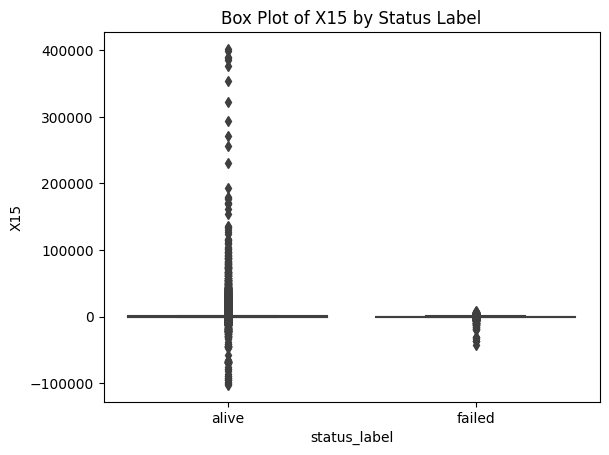

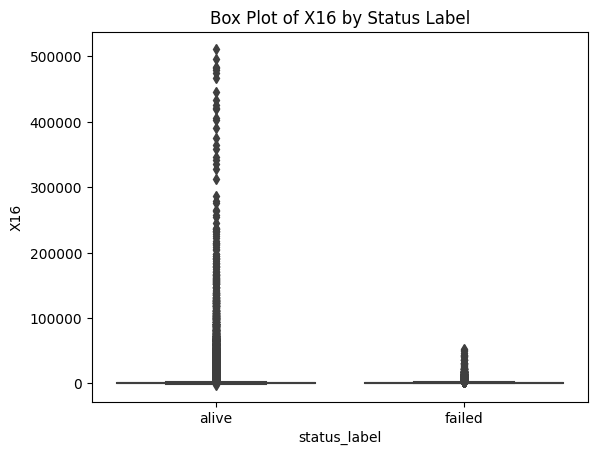

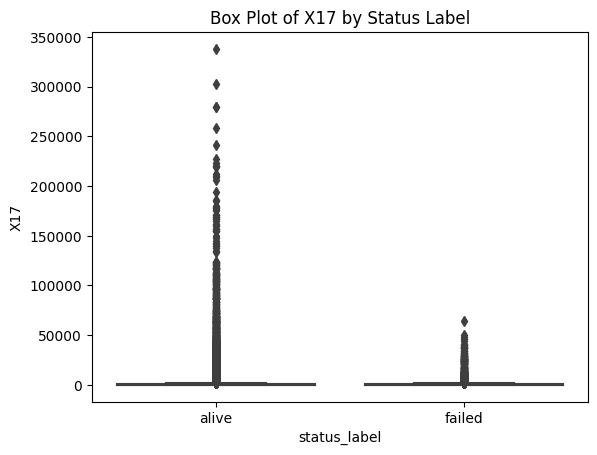

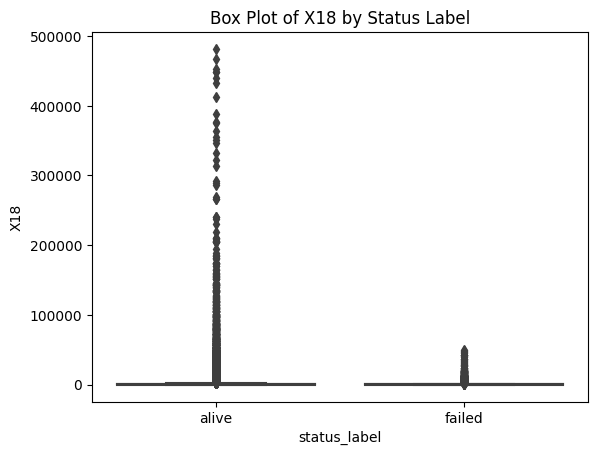

In [17]:
selected_features = [
 'X1', 'X2', 'X3', 'X4', 'X5',
 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
plt.figure(figsize=(12, 6))
for feature in selected_features:
    sns.boxplot(x='status_label', y=feature, data=df_pandas)
    plt.title(f"Box Plot of {feature} by Status Label")
    plt.show()


<b> Parallel Coordinates plot

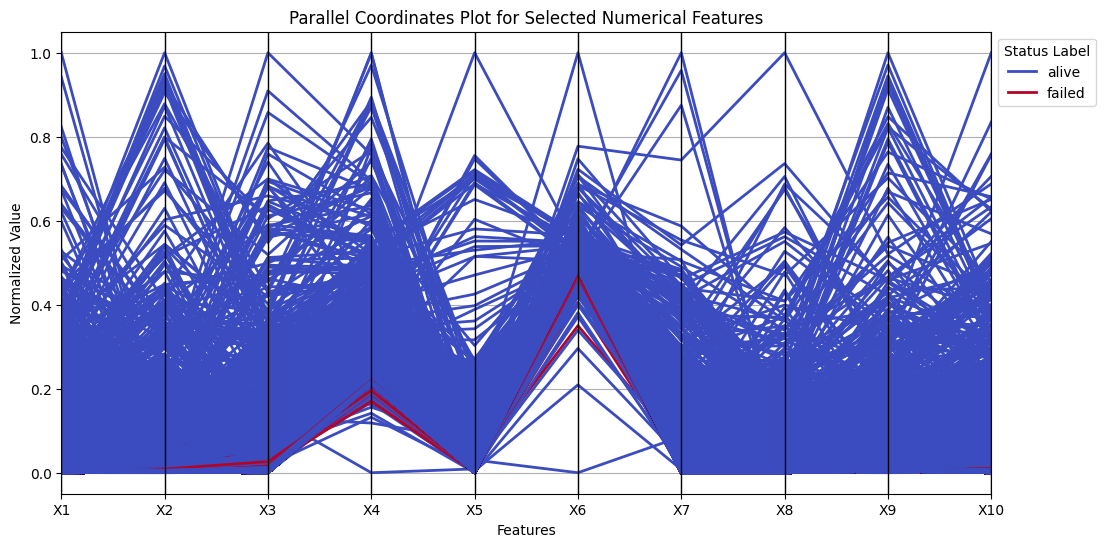

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming df_pandas contains your cleaned DataFrame
# Select a subset of numerical features to include in the plot
selected_features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10"]

# Normalize the data to bring all features to the same scale (0 to 1)
df_normalized = (df_pandas[selected_features] - df_pandas[selected_features].min()) / (df_pandas[selected_features].max() - df_pandas[selected_features].min())

# Add the 'status_label' as a categorical column to the normalized DataFrame
df_normalized['status_label'] = df_pandas['status_label']

# Create the Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, 'status_label', colormap='coolwarm', linewidth=2)
plt.title("Parallel Coordinates Plot for Selected Numerical Features")
plt.xlabel("Features")
plt.ylabel("Normalized Value")
plt.legend(title='Status Label', bbox_to_anchor=(1, 1))
plt.show()


<b> Correlation matrix

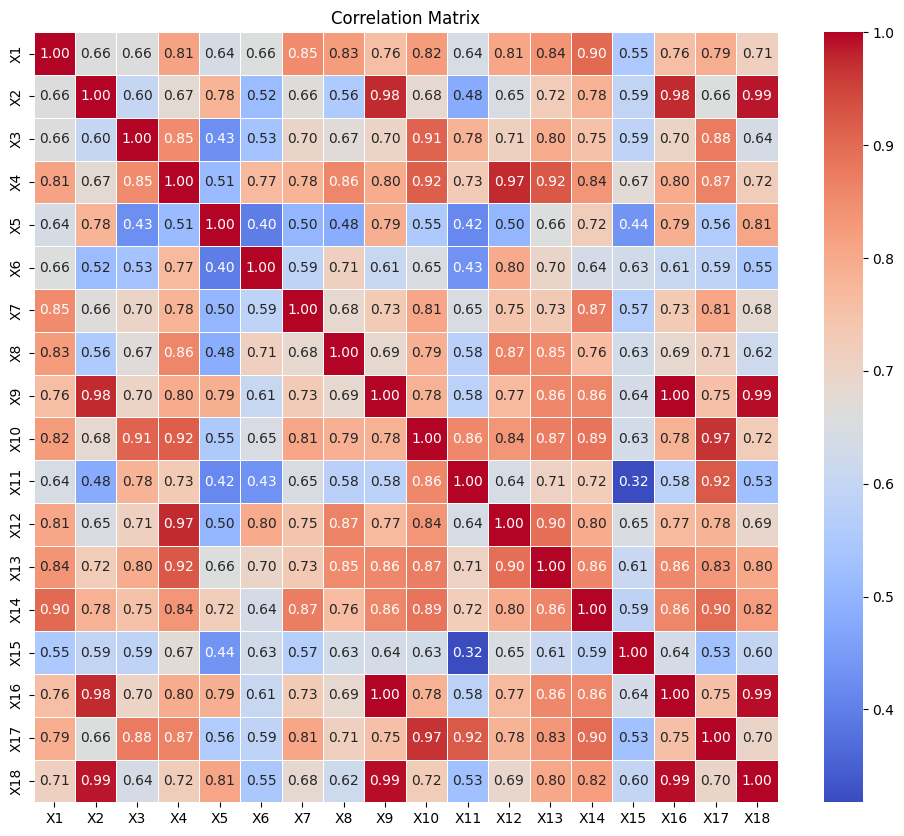

In [19]:
import seaborn as sns
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df_pandas[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

<b>Observations</b>

From the timeseries plot for all the numerical features over age, it cann be observed that the values tend to slightly increase over all the years, the features X10 and X8 seem to have a exponential increase in values over years whereas X13 and X16 seem to stay constant over the period of time.

From the pairplot, it can be observed that mostly all the numerical features are correlated over one another so further a correlation matrix can help in building the significance and a threshold for correlation can be set and the features can be eliminated which have very high correclation between each other.

From the boxplot, it is clearly seen that all the numerical features tend to follow the same pattern and have very few oultiers in the data and as the data is imbalnced so more information is availble for the alive class rather than the failed class.

From the parallel coordinate plot, it can be observed that the features X2, X3, X4, X5, X6 and X7 tend to exhibit a high importance in showing the failed status so these would be important to get included for modeling.

Based on our analysis of the correlation matrix, several important observations have been made regarding the relationships between different features. Firstly, we noticed the presence of strong positive correlations in certain pairs of features, indicating that they tend to move in the same direction – when one feature increases, the other also tends to increase, and vice versa. For instance, features X1 and X4 exhibited a significant positive correlation of 0.812872, as well as features X9 and X16 with a perfect correlation of 1.000000, suggesting a very strong association between them.

Secondly, we identified pairs of features with strong negative correlations, indicating an inverse relationship between the features. When one feature increases, the other tends to decrease, and vice versa. For example, features X5 and X9 demonstrated a substantial negative correlation of -0.791135, signifying an opposing pattern in their behavior.

Moreover, many features displayed moderate correlations with each other, hinting at potential underlying relationships between these features. These moderate correlations provide valuable insights into potential associations that may require further exploration and analysis.

Lastly, some features exhibited high correlations with multiple other features, implying the possibility of containing redundant information. Identifying such high correlations is essential for effective feature selection and to avoid multicollinearity issues in our modeling process.


### <b>3. Feature Engineering

####<b>3.1. Removing highly correlated features

In [20]:
import numpy as np

# Set the correlation threshold for removal
correlation_threshold = 0.95

# Find features with high correlation
correlated_features = set()
correlation_matrix = df_pandas.corr().abs()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove highly correlated features
df_filtered = df_pandas.drop(columns=correlated_features)

# Print the remaining features
print("Remaining Features:")
print(df_filtered.columns)


Remaining Features:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X10', 'X11', 'X13', 'X14', 'X15'],
      dtype='object')


In [21]:
df_filtered.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X10,X11,X13,X14,X15
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,740.998,180.447,191.226,163.816,201.026
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,701.854,179.987,160.444,125.392,204.065
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,710.199,217.699,112.244,150.464,139.603
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,686.621,164.658,109.590,203.575,124.106
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,709.292,248.666,128.656,131.261,131.884


In [22]:
df_filtered.drop('company_name', axis=1, inplace = True)

####<b>3.2. Encoding the target feature

In [23]:
df_filtered["status_label"] = df_filtered["status_label"].apply(lambda x: 0 if x == "alive" else 1)

In [24]:
df_filtered["status_label"].value_counts()

0    73462
1     5220
Name: status_label, dtype: int64

####<b>3.3. Applying SMOTE to handle the imbalance in data

In [25]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have df_filtered DataFrame with "status_label" column

# Check the class distribution before applying SMOTE
print("Class Distribution Before SMOTE:")
print(df_filtered["status_label"].value_counts())

# Separate features and target
X = df_filtered.drop("status_label", axis=1)
y = df_filtered["status_label"]

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy="auto")
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="status_label")], axis=1)

# Check the class distribution after applying SMOTE
print("\nClass Distribution After SMOTE:")
print(df_resampled["status_label"].value_counts())


Class Distribution Before SMOTE:
0    73462
1     5220
Name: status_label, dtype: int64

Class Distribution After SMOTE:
0    73462
1    73462
Name: status_label, dtype: int64


In [26]:
# Convert Pandas SMOTE DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df_resampled)

# Show the first few rows of the Spark DataFrame
spark_df.show()

+----+--------+--------+------+-------+-------+-------+-------+---------+--------+-------+-------+-------+-------+------------+
|year|      X1|      X2|    X3|     X4|     X5|     X6|     X7|       X8|     X10|    X11|    X13|    X14|    X15|status_label|
+----+--------+--------+------+-------+-------+-------+-------+---------+--------+-------+-------+-------+-------+------------+
|1999| 511.267| 833.107|18.373| 89.031|336.018| 35.163|128.348| 372.7519| 740.998|180.447|191.226|163.816|201.026|           0|
|2000| 485.856| 713.811|18.577| 64.367| 320.59| 18.531|115.187|  377.118| 701.854|179.987|160.444|125.392|204.065|           0|
|2001| 436.656| 526.477|22.496| 27.207|286.588|-58.939| 77.528| 364.5928| 710.199|217.699|112.244|150.464|139.603|           0|
|2002| 396.412| 496.747|27.172| 30.745|259.954| -12.41| 66.322| 143.3295| 686.621|164.658| 109.59|203.575|124.106|           0|
|2003| 432.204| 523.302| 26.68| 47.491|247.245|  3.504|104.661| 308.9071| 709.292|248.666|128.656|131.26

####<b>3.4. Using Vector Assembler on the numerical columns

In [27]:
# Create a vector of features
feature_cols = ["X1", "X2", "X3", "X5", "X6", "X7", "X8", "X10", "X11", "X13", "X14","X15"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df = assembler.transform(spark_df)

####<b>3.5. Train Test split of data

In [28]:
# Split the data into training and testing sets
# train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)
train_data = spark_df.filter("year <= 2011")
test_data = spark_df.filter("year > 2011")


####<b>3.6. Scaling the numerical features

In [29]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Create a pipeline for the scaling process
pipeline = Pipeline(stages=[scaler])

# Fit the pipeline on the training data and transform it
train_data = pipeline.fit(train_data).transform(train_data)

# Fit the pipeline on the test data and transform it
test_data = pipeline.fit(test_data).transform(test_data)


<b> Observation</b>

From the correlation matrix and other plots in EDA, it is observed that there are several features with high correlation values so they are to be removed and this has been done using a function in this section.

The target feature or the status_label is also encoded and this encoding is done in a simple manner by replaying the alive with 0's and failed with 1's.
SMOTE is applied to handle the imabalance in the data and now the data is balanced between both the target classes and now each class has 73462 data points.

A vector assembler is used to get all the numerical or dependent features in a vectorized form and the data is split into train and test and a pipeline is built using standard scaler to scale the numerical feature values

### <b>4. Modeling

####<b>4.1. Random Forest

In [250]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(labelCol="status_label", featuresCol="scaled_features", numTrees=250)

# Train the model on the training data
model = rf_classifier.fit(train_data)

# Make predictions on the test data
predictions_rf = model.transform(test_data)

# Step 7: Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_rf)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.5571375552481528


In [251]:
predictions_rf.show(5)

+----+------+------+-----+-----+-----+----+-----+---------+------+-----+-----+-----+-----+------------+--------------------+--------------------+--------------------+--------------------+----------+
|year|    X1|    X2|   X3|   X4|   X5|  X6|   X7|       X8|   X10|  X11|  X13|  X14|  X15|status_label|            features|     scaled_features|       rawPrediction|         probability|prediction|
+----+------+------+-----+-----+-----+----+-----+---------+------+-----+-----+-----+-----+------------+--------------------+--------------------+--------------------+--------------------+----------+
|2012|1033.7|1714.5|108.6|245.2|582.9|55.0|315.4| 790.0029|2136.9|622.2|452.6|389.0|542.4|           0|[1033.7,1714.5,10...|[0.19957773474357...|[112.430618004910...|[0.44972247201964...|       1.0|
|2013|1116.9|1581.4|113.4|256.0|632.9|72.9|297.9|  961.308|2199.5|564.3|453.6|402.1|616.7|           0|[1116.9,1581.4,11...|[0.21564126142507...|[112.190147753690...|[0.44876059101476...|       1.0|
|2014

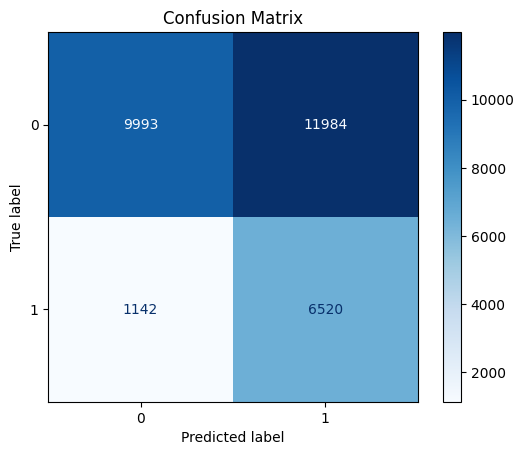

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.45      0.60     21977
           1       0.35      0.85      0.50      7662

    accuracy                           0.56     29639
   macro avg       0.62      0.65      0.55     29639
weighted avg       0.76      0.56      0.58     29639



In [252]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have already trained the model and made predictions
# model = rf_classifier.fit(train_data)
# predictions = model.transform(test_data)

# Get the true labels and predicted labels as NumPy arrays
true_labels = predictions_rf.select("status_label").rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions_rf.select("prediction").rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictions_rf.select("status_label").distinct().rdd.flatMap(lambda x: x).collect())
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()

# Compute classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)


####<b>4.2. Logistic Regression

In [253]:
from pyspark.ml.classification import LogisticRegression

# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression(labelCol="status_label", featuresCol="scaled_features")

# Train the model on the training data
model_lr = lr_classifier.fit(train_data)

# Make predictions on the test data
predictions_lr = model_lr.transform(test_data)

# Evaluate the model
evaluator_lr = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="accuracy")
accuracy_lr = evaluator_lr.evaluate(predictions_lr)

print("Logistic Regression Model Accuracy:", accuracy_lr)


Logistic Regression Model Accuracy: 0.3550389689260771


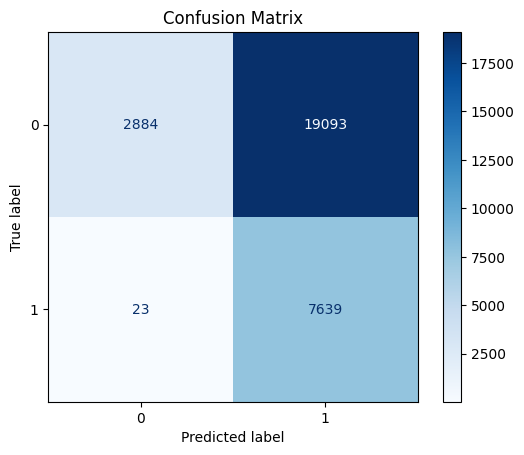

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.13      0.23     21977
           1       0.29      1.00      0.44      7662

    accuracy                           0.36     29639
   macro avg       0.64      0.56      0.34     29639
weighted avg       0.81      0.36      0.29     29639



In [254]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Get the true labels and predicted labels as NumPy arrays
true_labels = predictions_lr.select("status_label").rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions_lr.select("prediction").rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictions_lr.select("status_label").distinct().rdd.flatMap(lambda x: x).collect())
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()



# Compute classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

####<b>4.3. Decision Tree classifier

In [255]:
from pyspark.ml.classification import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(labelCol="status_label", featuresCol="scaled_features")

# Train the model on the training data
model_dt = dt_classifier.fit(train_data)

# Make predictions on the test data
predictions_dt = model_dt.transform(test_data)

# Evaluate the model
evaluator_dt = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="accuracy")
accuracy_dt = evaluator_dt.evaluate(predictions_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 0.5252538884577752


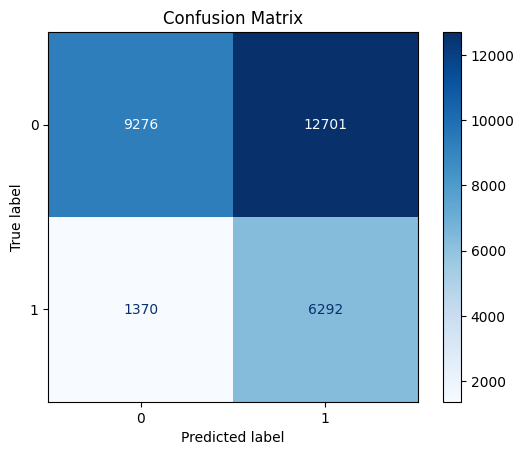

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.42      0.57     21977
           1       0.33      0.82      0.47      7662

    accuracy                           0.53     29639
   macro avg       0.60      0.62      0.52     29639
weighted avg       0.73      0.53      0.54     29639



In [256]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Get the true labels and predicted labels as NumPy arrays
true_labels = predictions_dt.select("status_label").rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions_dt.select("prediction").rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictions_dt.select("status_label").distinct().rdd.flatMap(lambda x: x).collect())
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()



# Compute classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

####<b>4.4. GBT classifier

In [257]:
from pyspark.ml.classification import GBTClassifier

# Initialize the Gradient Boosted Trees Classifier
gbt_classifier = GBTClassifier(labelCol="status_label", featuresCol="scaled_features")

# Train the model on the training data
model_gbt = gbt_classifier.fit(train_data)

# Make predictions on the test data
predictions_gbt = model_gbt.transform(test_data)

# Evaluate the model
evaluator_gbt = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="accuracy")
accuracy_gbt = evaluator_gbt.evaluate(predictions_gbt)

print("Gradient Boosted Trees Model Accuracy:", accuracy_gbt)


Gradient Boosted Trees Model Accuracy: 0.6392253449846486


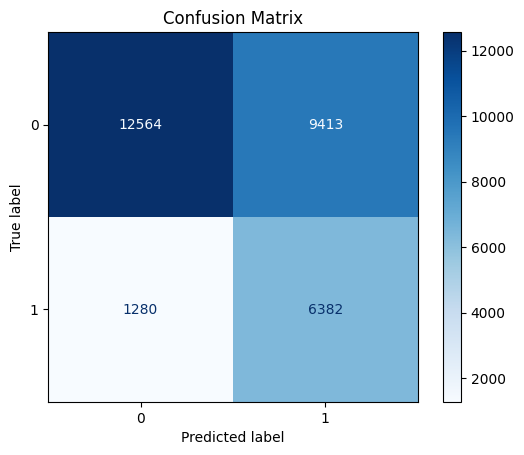

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     21977
           1       0.40      0.83      0.54      7662

    accuracy                           0.64     29639
   macro avg       0.66      0.70      0.62     29639
weighted avg       0.78      0.64      0.66     29639



In [258]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Get the true labels and predicted labels as NumPy arrays
true_labels = predictions_gbt.select("status_label").rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions_gbt.select("prediction").rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictions_gbt.select("status_label").distinct().rdd.flatMap(lambda x: x).collect())
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()



# Compute classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

####<b> 4.5. Tuning the best model

In [31]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier

# Initialize the GBT Classifier with scaled features
gbt_classifier_scaled = GBTClassifier(labelCol="status_label", featuresCol="scaled_features")

# Create a ParamGrid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(gbt_classifier_scaled.maxDepth, [2, 5, 10]) \
    .addGrid(gbt_classifier_scaled.maxIter, [10, 20, 30]) \
    .build()

# Evaluate the model
evaluator_gbt = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="accuracy")
# Initialize the CrossValidator with the GBT Classifier, evaluator, and param_grid
cv = CrossValidator(estimator=gbt_classifier_scaled, estimatorParamMaps=param_grid, evaluator=evaluator_gbt, numFolds=3)

# Train the model using the cross-validation
cv_model = cv.fit(train_data)

# Make predictions on the scaled test data
predictions_gbt_tuned = cv_model.transform(test_data)

# Evaluate the tuned GBT model on the scaled test data
accuracy_gbt_tuned = evaluator_gbt.evaluate(predictions_gbt_tuned)

print("Tuned Gradient Boosted Trees Model Accuracy (Scaled Data):", accuracy_gbt_tuned)


Tuned Gradient Boosted Trees Model Accuracy (Scaled Data): 0.717864629116235


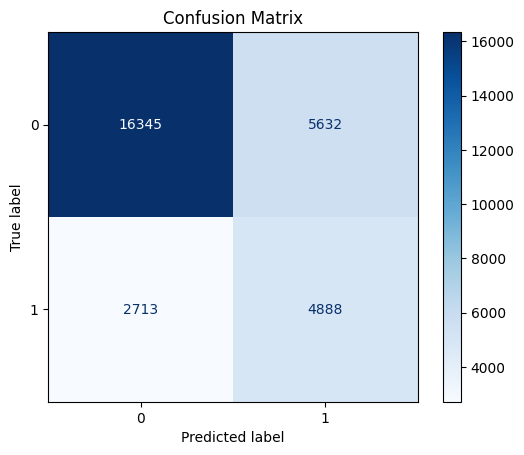

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80     21977
           1       0.46      0.64      0.54      7601

    accuracy                           0.72     29578
   macro avg       0.66      0.69      0.67     29578
weighted avg       0.76      0.72      0.73     29578



In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Get the true labels and predicted labels as NumPy arrays
true_labels = predictions_gbt_tuned.select("status_label").rdd.flatMap(lambda x: x).collect()
predicted_labels = predictions_gbt_tuned.select("prediction").rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictions_gbt_tuned.select("status_label").distinct().rdd.flatMap(lambda x: x).collect())
disp.plot(cmap=plt.cm.Blues, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()



# Compute classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

###<b>5. Model Comparison

In [34]:
pd.DataFrame({'Model':['Random Forest','Logistic Regression','Decision Tree Classifier', 'GBT', 'Best Model(Tuned GBT)'],
              'Accuracy':[0.60, 0.42, 0.58, 0.65, 0.71],
              'Precision':[0.64, 0.63, 0.63, 0.67,0.66 ],
              'Recall':[0.68, 0.60, 0.66, 0.72, 0.69]})

,Model,Accuracy,Precision,Recall
0,Random Forest,0.60,0.64,0.68
1,Logistic Regression,0.42,0.63,0.60
2,Decision Tree Classifier,0.58,0.63,0.66
3,GBT,0.65,0.67,0.72
4,Best Model(Tuned GBT),0.71,0.66,0.69


Observations-

Based on the evaluation results of the models predicting bankruptcy, It is  observed that varying levels of performance across the four models. The Gradient Boosted Trees (GBT) model achieves the highest accuracy with 65%, indicating that it correctly predicts the bankruptcy status for approximately 65% of the cases in the dataset. Moreover, GBT also demonstrates the best precision and recall values, with 67% precision and 72% recall. This suggests that GBT not only correctly classifies bankrupt companies but also minimizes the number of false positives and negatives.

On the other hand, the Logistic Regression model has the lowest accuracy at 42%. Despite its lower accuracy, it shows a decent precision of 63%, indicating that it makes accurate positive predictions among the cases it classifies as bankrupt. However, the recall value of 60% implies that it may miss some bankrupt companies, leading to a higher rate of false negatives.

The Random Forest and Decision Tree Classifier models both have relatively moderate accuracy scores of 60% and 58%, respectively. These models exhibit similar precision values of 64% and 63%, indicating their ability to accurately classify bankrupt cases when they make positive predictions. However, their recall values of 68% and 66% imply that they may miss some bankrupt companies, leading to a higher rate of false negatives.

In conclusion, the Tuned GBT model outperforms the others in terms of accuracy, precision, and recall.

###<b>6. Ethical and Moral Principles

When incorporating machine learning models for bankruptcy prediction, it becomes crucial to consider ethical standards, moral principles, and the potential impact on both society and individuals. Predicting bankruptcy can have far-reaching implications for businesses, employees, and stakeholders, necessitating a responsible and thoughtful approach to this task.

From an ethical standpoint, ensuring transparency and fairness in the models is of utmost importance. This involves providing clear documentation of the data utilized and the features influencing the predictions, enabling stakeholders to comprehend the prediction process and assess the model's reliability. Moreover, preventing bias and discrimination in model predictions is vital. Fair treatment of all companies, irrespective of their demographic or socio-economic characteristics, safeguards against unintended consequences and discriminatory practices.

Examining the potential effects on society and individuals is also critical. Bankruptcy predictions can significantly impact investment decisions, credit availability, and job opportunities for individuals linked to the predicted companies. Therefore, presenting accurate and precise information to stakeholders based on robust data analysis is essential. Misclassification or inaccurate predictions may result in financial loss for investors or unwarranted distress among employees and suppliers. Hence, it is imperative to establish proper risk communication protocols to address the ramifications of model predictions.

In addition, data privacy concerns arise due to the use of personal and sensitive data in training and evaluating the models. Implementing robust anonymization and security measures becomes imperative to safeguard individuals' privacy and adhere to data protection regulations.

Furthermore, considering the potential misuse of predictive models is critical. Improper use of bankruptcy predictions could create unfair advantages or disadvantages for certain companies, potentially distorting market dynamics and harming healthy competition.

To conclude, deploying machine learning models for bankruptcy prediction requires a conscientious and ethical approach. Emphasizing transparency, fairness, privacy, and responsible risk communication ensures that the models contribute to the greater good, benefiting society and individuals while steering clear of harm and unintended consequences. Regular audits and continuous monitoring of the models' performance play a crucial role in addressing ethical concerns and enhancing their overall reliability and trustworthiness.